In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from pandas import get_dummies
import chart_studio.plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [5]:
# A few adjustments to style for better readability
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [6]:
df = pd.read_csv("synthetic.csv")
print("The Dimensions of our data set are:",df.shape)
print(df.head())
df.describe()

The Dimensions of our data set are: (1000, 31)
          x1        x2        x3        x4         x5         x6         x7  \
0 -14.698830  2.369710  1.089267 -1.262030 -15.650082 -16.665997  15.909853   
1  -8.457451  2.182712  0.972360 -4.255289 -11.524392  -4.843399   9.557964   
2  -6.541517  1.263892 -0.494469 -2.562072  -8.979410 -23.632245  15.740920   
3 -18.139840  1.569545 -3.286717 -4.255045 -16.146687 -25.893126  12.005963   
4 -12.500957  2.313632  5.227138  2.586718 -15.022213  -3.105726  18.070314   

          x8         x9       x10  ...       x22        x23       x24  \
0 -11.121045  18.275820 -2.405075  ... -5.421817  15.233291 -3.484405   
1 -10.145921   6.655710 -2.821156  ... -5.398857  20.342647 -5.395054   
2  -4.460916 -16.528412 -3.901285  ... -5.339781  10.859401 -2.095555   
3  -2.228017   5.853151 -2.951831  ... -5.652446  -8.674892 -9.665123   
4  -7.745197   0.300133 -3.364458  ... -5.551594  13.195368 -5.089818   

         x25        x26        x27     

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-13.028746,2.182041,-0.331036,-1.501078,-12.622918,-10.854249,15.199978,-1.989472,6.407913,-2.926042,...,-5.472288,10.543841,-6.003123,3.746927,18.425973,2.742845,3.475475,1.864313,-1.137531,0.145000
std,3.659720,1.314388,4.259927,1.922640,3.604514,9.750920,7.206344,6.454849,16.872978,0.673362,...,0.272104,8.311382,1.873970,4.962534,6.134947,7.049830,2.048401,10.351793,8.543692,0.352277
min,-25.548066,-1.599455,-14.930338,-10.215498,-24.600418,-55.753091,-4.320908,-22.643235,-51.040173,-4.907236,...,-6.378320,-14.553686,-12.804169,-10.970233,-1.014732,-18.778590,-2.594584,-30.715194,-27.231646,0.000000
25%,-15.588659,1.285855,-3.149624,-2.808884,-15.109200,-17.120274,10.231755,-6.188742,-4.853568,-3.383162,...,-5.666194,4.728117,-7.268277,0.279869,14.232877,-2.051034,2.102943,-4.779697,-6.883752,0.000000
50%,-13.072938,2.170483,-0.367062,-1.510223,-12.498793,-11.170167,15.196222,-2.026093,6.431541,-2.928571,...,-5.467538,10.698797,-5.919298,3.841361,18.301716,2.989103,3.488600,1.362105,-1.012529,0.000000
75%,-10.534016,3.021294,2.485166,-0.237209,-10.214818,-4.522221,19.901376,2.392737,18.145285,-2.487445,...,-5.287631,16.268073,-4.677299,7.306957,22.495502,7.393532,4.913292,8.998301,4.753629,0.000000
max,-2.382520,6.026316,14.980421,5.101086,2.182904,23.826332,36.646915,19.820630,55.897492,-0.712244,...,-4.671847,36.154495,-0.188857,20.068337,36.539176,25.577773,9.590002,31.900767,31.280122,1.000000


From the above outputs we come to know the total data set has 1000 observations with a total of 31 variables ranging from x1 to x30 and y. The y variable is a binomial and is the target variable in our assignment. The describe method from pandas library gives the complete statistical information of our data set and by seeing this we can understand that all independent variables (x1 to x30) are continuous and seeing their quartile averages they seem to be normally distributed.

In [7]:
# To check the type of dataset its loaded
type(df)
# Index, Datatype and Memory information
df.info()
# To check for any null or missing values
df.isnull()
# To check the total number of null values
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
x1     1000 non-null float64
x2     1000 non-null float64
x3     1000 non-null float64
x4     1000 non-null float64
x5     1000 non-null float64
x6     1000 non-null float64
x7     1000 non-null float64
x8     1000 non-null float64
x9     1000 non-null float64
x10    1000 non-null float64
x11    1000 non-null float64
x12    1000 non-null float64
x13    1000 non-null float64
x14    1000 non-null float64
x15    1000 non-null float64
x16    1000 non-null float64
x17    1000 non-null float64
x18    1000 non-null float64
x19    1000 non-null float64
x20    1000 non-null float64
x21    1000 non-null float64
x22    1000 non-null float64
x23    1000 non-null float64
x24    1000 non-null float64
x25    1000 non-null float64
x26    1000 non-null float64
x27    1000 non-null float64
x28    1000 non-null float64
x29    1000 non-null float64
x30    1000 non-null float64
y      1000 non-null int

False

The above output shows that the independent values are all loaded as float and the target variable is an integer. There are no null values and does not require any further cleaning of the data to deploy our model.

<Figure size 432x288 with 0 Axes>

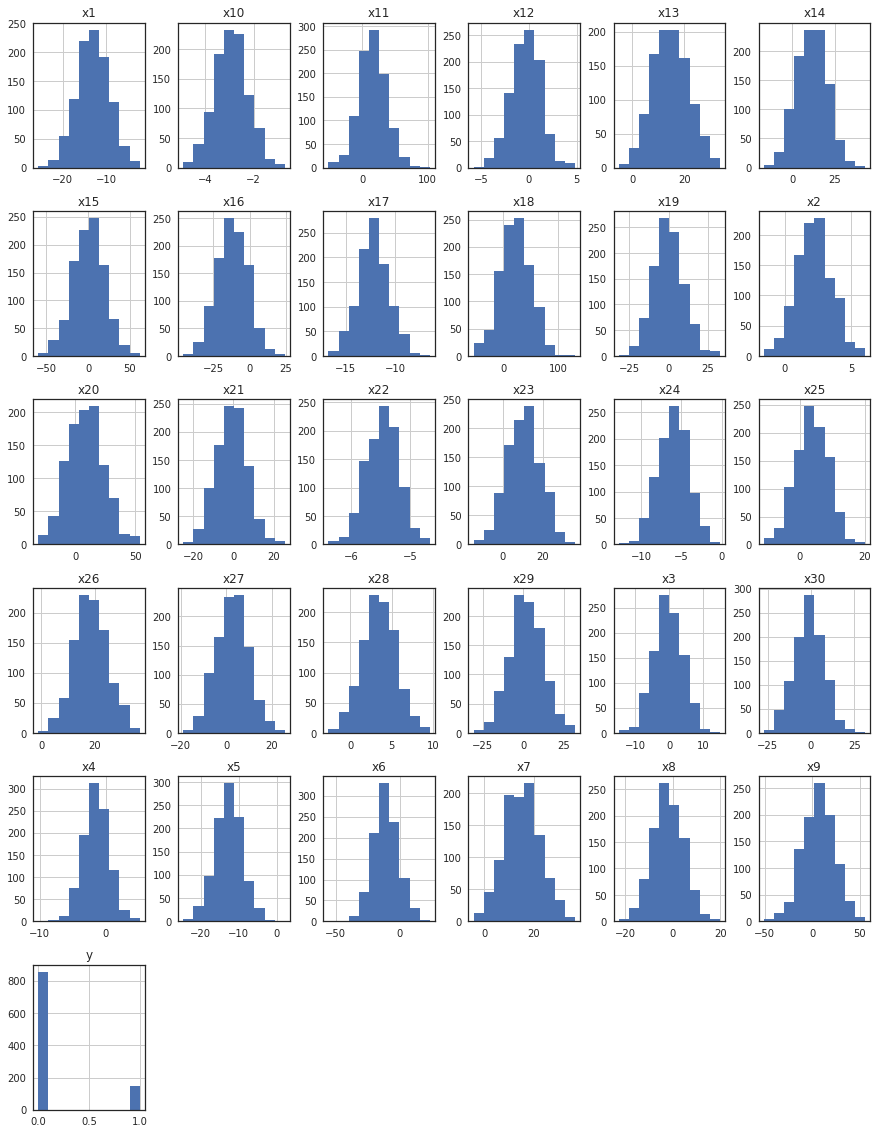

<Figure size 432x288 with 0 Axes>

In [8]:
# graphical visualization of the data to check for the type of distribution
df.hist(figsize=(15,20))
plt.figure()

from the above visualizations we can conclude that all the independent variables are normally distributed. Our target variable on the other hand is an imbalanced class. Let us explore our target variable counts

In [6]:
df["y"].value_counts()

0    855
1    145
Name: y, dtype: int64

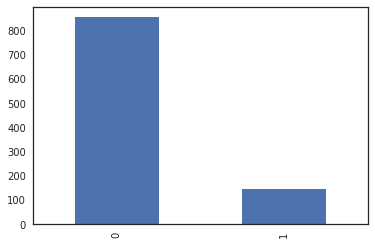

In [7]:
df['y'].value_counts().plot(kind="bar");

The above plots and counts show that only 14.5% of the data is 1 and the remaining is 0, we have an imbalanced class and we need to take this point in cosideration when trying to model our classifier

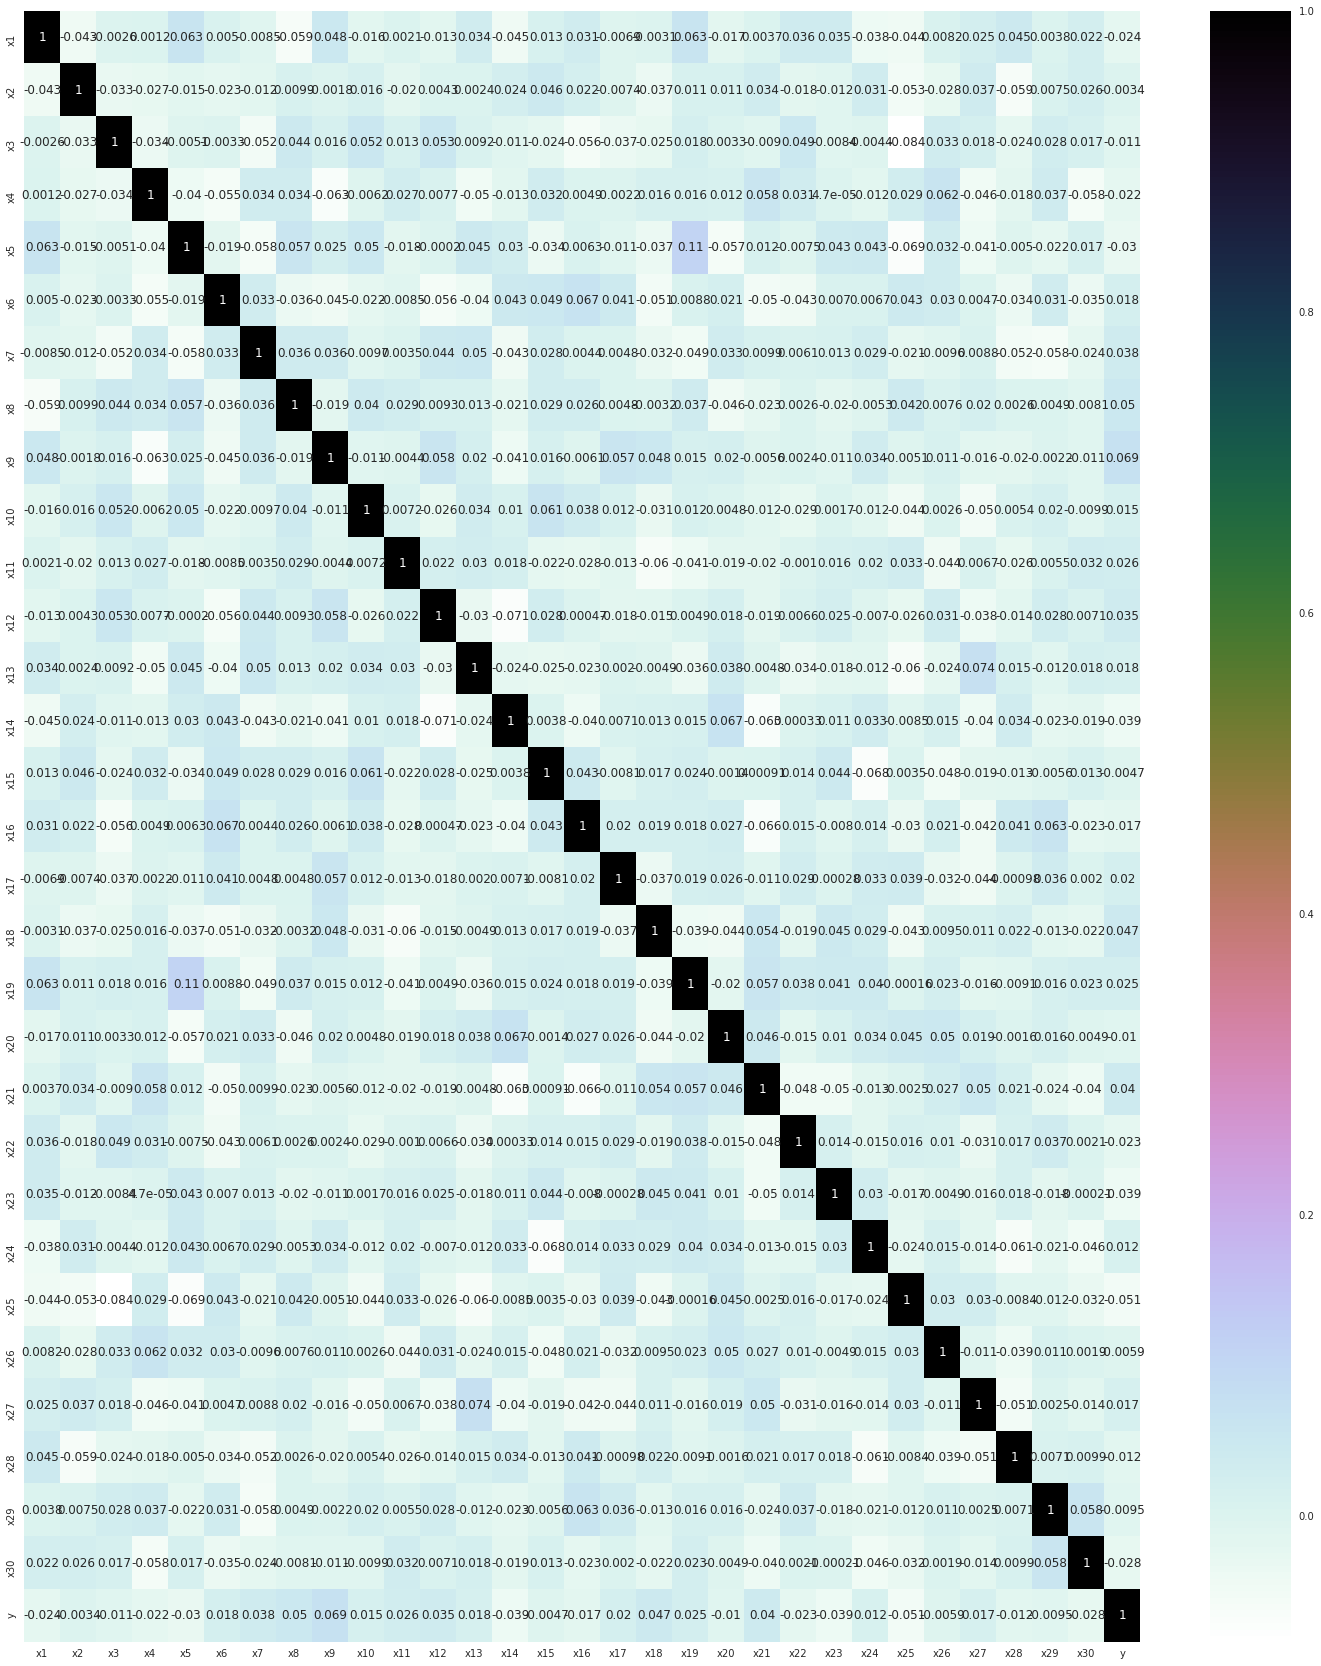

In [8]:
# Correlation plot to see for correlations between the data
plt.figure(figsize=(25,30)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')#draws heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

The above plot shows that the data is not correlated with each other and we can use all the avariables to build a model

<Figure size 432x288 with 0 Axes>

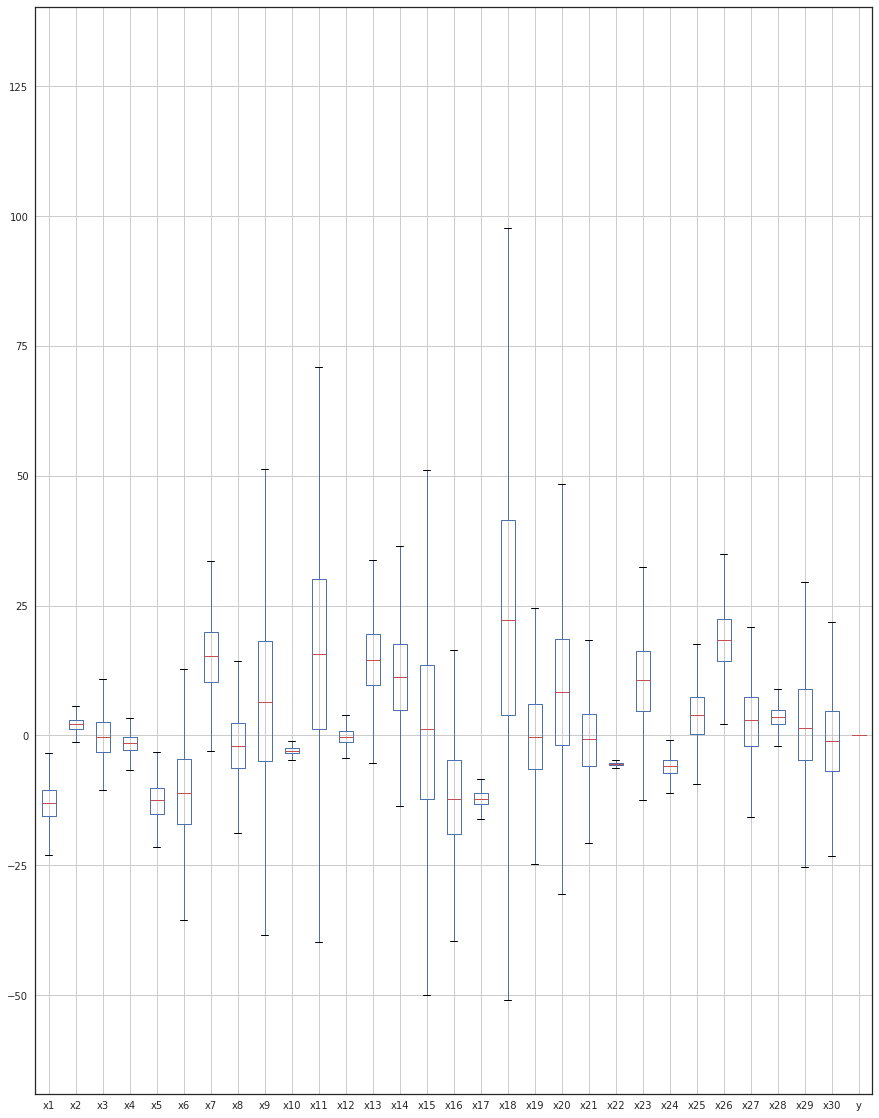

<Figure size 432x288 with 0 Axes>

In [9]:
# boxplot of the variables to see for their standard deviations and outliers if any
df.boxplot(figsize=(15,20))
plt.figure()

The above graphs shows that there are no specific outliers in the data set. But the standard deviations of all the variables are different. We will divide the dataset into two components of target and independent variables and then standardize the data.
Standardizing the data makes all the variables internally to follow the same deviance which make the comparision easy. If all data points follow a Gaussian distribution, Machine learning algorithm can work  well if we apply standardization.  

We apply the standardization after splitting the data into test and train. We do not use a validation here as the dataset is small, and we can use cross validation to validate later. Since the data we want to test should be from the real world we do not want any changes or features to be changed from our test data.

In [9]:
X=df.drop(["y"],1) #independent variables
y=df["y"] # target variable
#splitting the data and stratifying y so that we have similar observations of 1 and 0 in our test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Check the dataset for their shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_test.value_counts()

(800, 30) (800,)
(200, 30) (200,)


0    171
1     29
Name: y, dtype: int64

Since the traget variable is an imbalanced class we do not use the accuracy as the metric, but we use the f1 score.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.  

The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
KNN: 0.155916 (0.118979)
RNC: 0.000000 (0.000000)
PAC: 0.136005 (0.025680)
CART: 0.452565 (0.111390)
NB: 0.166178 (0.096999)
BNB: 0.000000 (0.000000)
RF: 0.000000 (0.000000)
SVM: 0.000000 (0.000000)
BAG: 0.386925 (0.156264)
GB: 0.458426 (0.127044)
ADA: 0.237913 (0.085237)


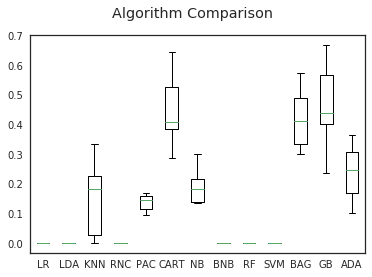

In [13]:
# prepare configuration for cross validation
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RNC', RadiusNeighborsClassifier(radius=8.0)))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier(max_depth=2)))
models.append(('SVM', SVC()))
models.append(('BAG', BaggingClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above output we see that descision tree, Naive Bayes, Bagging classifier, AdaBoost and gradient boosting classifier give better f1 results.  
The deviation of gradient boost looks better when cross validated between multiple folds. Let us choose that algorithm and test our output to get better understanding

In [14]:
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('0 class Transactions Detected (True Negatives): ', cm[0][0])
  print('0 class Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('1 class Transactions Missed (False Negatives): ', cm[1][0])
  print('1 class Transactions Detected (True Positives): ', cm[1][1])
  print('Total Transactions predicted as 1: ', np.sum(cm[1]))

0 class Transactions Detected (True Negatives):  164
0 class Transactions Incorrectly Detected (False Positives):  23
1 class Transactions Missed (False Negatives):  7
1 class Transactions Detected (True Positives):  6
Total Transactions predicted as 1:  13
accuracy is  0.85
f1 is  0.28571428571428575
roc is  0.6692719045660221
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       171
           1       0.46      0.21      0.29        29

    accuracy                           0.85       200
   macro avg       0.67      0.58      0.60       200
weighted avg       0.82      0.85      0.82       200



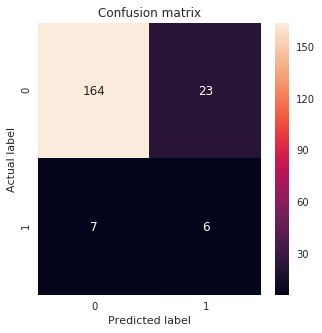

In [15]:
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
plot_cm(y_pred,y_test)
print('accuracy is ',accuracy_score(y_pred,y_test))
print('f1 is ',f1_score(y_pred,y_test))
print('roc is ',roc_auc_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

The above results show that we have a model accuracy of 0.88 and a f1 score of 0.43. The precision of detecting 1 is 0.75 with a recall of 0.3. We can improve the results by trying to resample the unbalanced class and see the results.

In [16]:
from scipy import stats
df_m = df # make a copy
z = np.abs(stats.zscore(df_m))
threshold = 3
print(np.where(z > 3))
print(df_m.shape)
df_oz = df_m[(z < 3).all(axis=1)] # creating a new dataset by removing the rows of the outlier values
print(df_oz.shape)

(array([ 18,  58,  79,  90, 104, 111, 133, 150, 167, 167, 180, 186, 187,
       192, 211, 223, 229, 262, 271, 323, 334, 343, 347, 348, 350, 351,
       366, 369, 375, 395, 398, 417, 418, 418, 429, 436, 439, 442, 442,
       444, 451, 466, 504, 515, 522, 529, 537, 537, 571, 592, 595, 640,
       642, 645, 651, 652, 687, 706, 769, 770, 775, 779, 781, 784, 798,
       798, 808, 809, 809, 828, 828, 841, 846, 851, 853, 865, 870, 886,
       900, 935, 991]), array([ 2, 14,  8, 20, 18, 13, 11, 10,  3, 29, 18, 15,  5,  5, 16, 22, 18,
        4, 21,  8, 11, 28, 23, 18, 20,  3, 15,  3, 13, 14,  0, 26,  0, 26,
        7, 15, 24,  2,  3,  5, 18, 24, 25, 21, 22, 20, 17, 29,  8, 11, 22,
       13,  7,  2, 14, 11, 10,  4, 14,  9, 19,  2, 16, 23,  3,  5, 15, 25,
       26, 15, 26, 18, 29,  7, 18, 20, 10,  4, 10,  2,  7]))
(1000, 31)
(926, 31)


In [17]:
X=df_oz.drop(["y"],1) #independent variables
y=df_oz["y"] # target variable
#splitting the data and stratifying y so that we have similar observations of 1 and 0 in our test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
ros = RandomOverSampler(random_state=88)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
smote = SMOTE(random_state=88)
X_smoted, y_smoted = smote.fit_resample(X_train, y_train)
adasyn = ADASYN(random_state=88)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
yvals, counts = np.unique(y_train, return_counts=True)
yvals_ros, counts_ros = np.unique(y_resampled, return_counts=True)
yvals_smt, counts_smt = np.unique(y_smoted, return_counts=True)
yvals_ads, counts_ads = np.unique(y_adasyn, return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)),'\n',
      'Classes in rebalanced test set with ROS:',dict(zip(yvals_ros, counts_ros)),'\n',
      'Classes in rebalanced test set with SMOTE:',dict(zip(yvals_smt, counts_smt)),'\n',
      'Classes in rebalanced test set with ADASYN:',dict(zip(yvals_ads, counts_ads)))

Classes in test set: {0: 634, 1: 106} 
 Classes in rebalanced test set with ROS: {0: 634, 1: 634} 
 Classes in rebalanced test set with SMOTE: {0: 634, 1: 634} 
 Classes in rebalanced test set with ADASYN: {0: 634, 1: 619}


ROS: 0.881171 (0.104781)
SMOTE: 0.826042 (0.141748)
ADASYN: 0.759044 (0.166952)


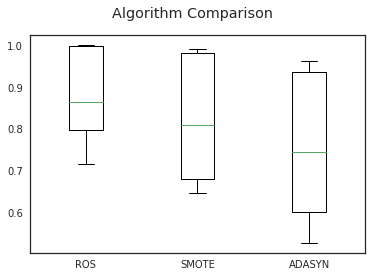

In [19]:
# prepare configuration for cross validation
seed = 7
# prepare data
stype = []
stype.append(('ROS',X_resampled, y_resampled))
stype.append(('SMOTE',X_smoted, y_smoted))
stype.append(('ADASYN',X_adasyn, y_adasyn))

results = []
names = []
scoring = 'f1'
for name, X, y in stype:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(GradientBoostingClassifier(), X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above results we can see that the f1 score has improved 0.32 to 0.8 and the ROS method gives us better results

0 class Transactions Detected (True Negatives):  145
0 class Transactions Incorrectly Detected (False Positives):  10
1 class Transactions Missed (False Negatives):  14
1 class Transactions Detected (True Positives):  17
Total Transactions predicted as 1:  31
accuracy is  0.8709677419354839
f1 is  0.5862068965517241
roc is  0.7419354838709677
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       159
           1       0.55      0.63      0.59        27

    accuracy                           0.87       186
   macro avg       0.74      0.77      0.75       186
weighted avg       0.88      0.87      0.87       186



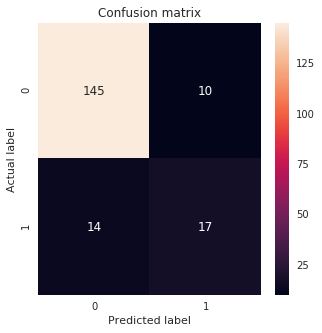

In [20]:
Model=GradientBoostingClassifier()
Model.fit(X_resampled, y_resampled)
y_pred=Model.predict(X_test)
plot_cm(y_pred,y_test)
print('accuracy is ',accuracy_score(y_pred,y_test))
print('f1 is ',f1_score(y_pred,y_test))
print('roc is ',roc_auc_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

The model results after resampling the data give a better outcome in the prediction of 1's and the f11 has also increased. But we see that roc value has decreased showing lower performance of the overall model. Let us tune the hyperparameters of this model to increase the ROC.  
We use gridSearch mathod to tune our model.

In [21]:
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingClassifier()
param = {
    'n_estimators': [None, 100, 150, 200, 250], 
    'max_depth': [None, 2, 3, 7, 11, 15],
    'learning_rate': [None, 0.1]
}
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score':make_scorer(f1_score),
    'roc_auc':make_scorer(roc_auc_score)
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Gradient Boost optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [22]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250}

Confusion matrix of Gradient Boost optimized for precision_score on the test data:
     pred_neg  pred_pos
neg       151         8
pos        17        10


The precision, recall, and accuracy scores for every combination of the parameters in param_grid are stored in cv_results_. Pandas DataFrame helps visualize the scores and parameters for each classifier iteration. This is included to show that although accuracy may be relatively consistent across classifiers, it’s obvious that precision and recall have a trade-off. Sorting by precision, the best scoring model should be the first record. This can be checked by looking at the parameters of the first record and comparing them to grid_search.best_params_ above.


In [23]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_n_estimators
49,0.967,0.998,0.982,7,250
48,0.963,0.998,0.979,7,200
47,0.961,0.998,0.979,7,150
46,0.960,0.998,0.978,7,100
52,0.947,1.000,0.972,11,150


let us try and optimize the model for recall

In [24]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}

Confusion matrix of Gradient Boost optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       144        15
pos        19         8


In [25]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_n_estimators
49,0.963,0.998,0.979,7,250
47,0.962,0.998,0.979,7,150
46,0.961,0.998,0.979,7,100
48,0.961,0.998,0.979,7,200
51,0.954,0.998,0.975,11,100


In this results we do not see any difference and it is not showing a better results to understand the parameters when tuning the model based on recall score.   

To have a better understading we need to define an optimizing point. The precision_recall_curve and roc_curve are useful tools to visualize the sensitivity-specificty tradeoff in the classifier. They help in finalizing an optimization point to set the decision threshold of our parameters.  

To achieve this we use predict._proba() from the scikit-learn to tune our parameters

In [26]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]

In [27]:
# Generate the precision-recall curve for the classifier
p, r, thresholds = precision_recall_curve(y_test, y_scores)

As the basic binary classification model operates at a threshold of 0.5 we can change the threshold value to obtain a better prediction by trying to minimize the fase positives. Increaing the precion and recall

In [28]:

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.2, 1.01]);
    plt.xlim([0.2, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)


     pred_neg  pred_pos
neg       144        15
pos        19         8


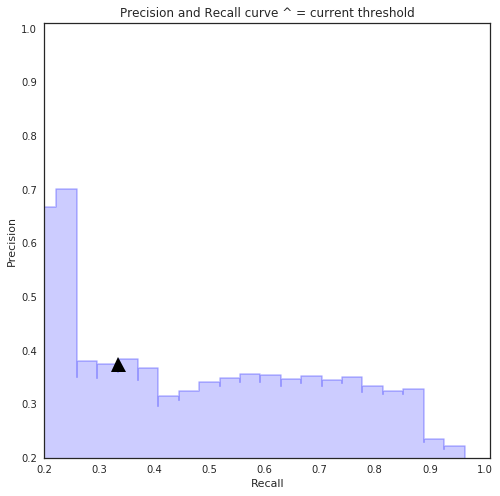

In [36]:
precision_recall_threshold(p, r, thresholds, 0.5)

After running the above method ranging from all values 0.3 to 0 the threshold looks quite low and decreasing the false positives is a bigger chanllenge and seems to avoid the complete false negatives we have to set a threshold value at such a lower position.

In [34]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

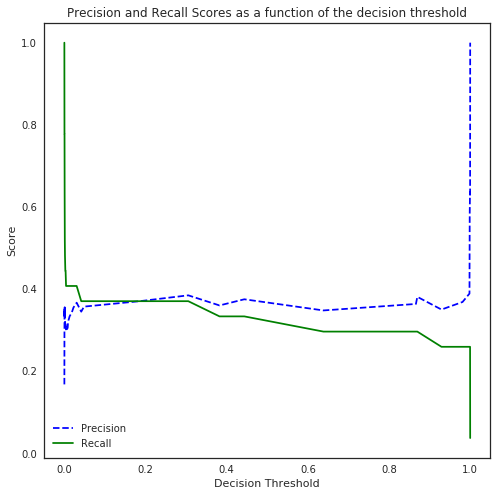

In [37]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8195200645291391


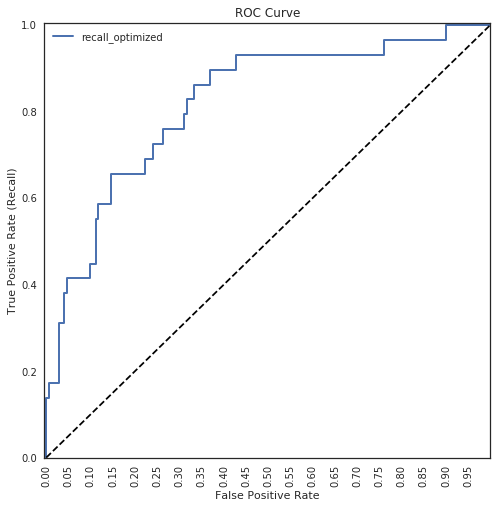

In [32]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

Finally, the ROC curve shows that to achieve a good recall, the model must select an operating point that allows for some false positive rate > 0.0

Based on the all the above models we can say that false negatives cant be avoided and the bet possible tuned algorithm model is with the achieved estimators in precision optimization. 

If the data is more keen towards false positives then we can change the threshold values as shown above. As per the present coursework since we don not know the nature of 1's we finalize our end model as below using the optimized model with the threshold of 0.1. By this we give importance to the outcomnes of 1 and achieve high predictions on 1

In [ ]:
X=df.drop(["y"],1) #independent variables
y=df["y"] # target variable
nfolds = 10
results=[]
kf = StratifiedKFold(n_splits = nfolds, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    # Convert y to one-dimensional array (vector)
    y_train = np.array(y_train).reshape((-1, ))
    y_test = np.array(y_test).reshape((-1, ))
    ros = RandomOverSampler(random_state=88)
    X_resampled, y_resampled = ros.fit_sample(x_train, y_train)
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(GradientBoostingClassifier(), X_resampled, y_resampled, cv=kfold, scoring="f1")
    
    results.append(cv_results)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print(msg)  

In [ ]:
The above results show that the k folds and average cross validation score of the complete data is similar. The number of 1 detected would be lower based on the default threshold. Since the probability of occurence of 1 is low so is the threshold value. SO we select the final model with gradient boos

In [33]:
def final(p, r, thresholds, t=0.5):
 
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    
    plot_cm(y_test, y_pred_adj)
    print('accuracy is ',accuracy_score(y_pred,y_test))
    print('f1 is ',f1_score(y_pred,y_test))
    print('roc is ',roc_auc_score(y_pred,y_test))
    print(classification_report(y_test,y_pred))
    

0 class Transactions Detected (True Negatives):  143
0 class Transactions Incorrectly Detected (False Positives):  28
1 class Transactions Missed (False Negatives):  10
1 class Transactions Detected (True Positives):  19
Total Transactions predicted as 1:  29
accuracy is  0.86
f1 is  0.48148148148148145
roc is  0.7142857142857143
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       171
           1       0.52      0.45      0.48        29

    accuracy                           0.86       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.85      0.86      0.86       200



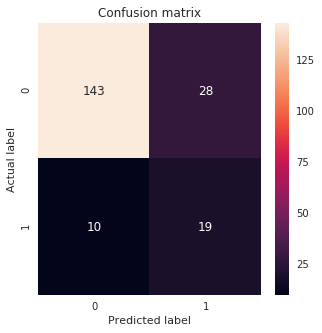

In [34]:
final(p, r, thresholds, 0.01)

In [44]:
X=df.drop(["y"],1) #independent variables
y=df["y"] # target variable
nfolds = 10
results=[]
kf = StratifiedKFold(n_splits = nfolds, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    # Convert y to one-dimensional array (vector)
    y_train = np.array(y_train).reshape((-1, ))
    y_test = np.array(y_test).reshape((-1, ))
    ros = RandomOverSampler(random_state=88)
    X_resampled, y_resampled = ros.fit_sample(x_train, y_train)
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(GradientBoostingClassifier(), X_resampled, y_resampled, cv=kfold, scoring="f1")
    
    results.append(cv_results)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print(msg)     

0.870447 (0.116506)
0.864288 (0.127115)
0.868349 (0.110146)
0.872635 (0.115524)
0.867055 (0.119067)
0.862409 (0.113378)
0.876098 (0.108677)
0.864972 (0.119779)
0.876049 (0.107811)
0.860608 (0.119474)
